In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
X11=df.drop(['target'],axis=1)
Y1=df['target'].copy()
discrete_var=[features for features in df.columns if len(df[features].unique())<25 and features not in ['target']]
print(discrete_var)
X1=df[discrete_var]
X1.head()

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


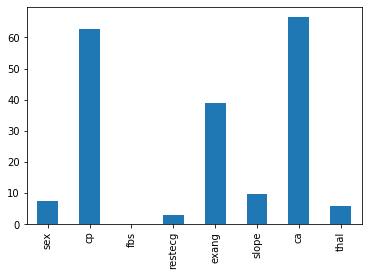

In [3]:
from sklearn.feature_selection import chi2
ch=chi2(X1,Y1)
p_value=ch[1]
chi2_value=ch[0]
import matplotlib.pyplot as plt 
%matplotlib inline
chi2_value=pd.Series(chi2_value)
chi2_value.index=X1.columns
chi2_value.plot.bar()
# p_value=pd.Series(p_value)
# p_value.index=X1.columns
# p_value.plot.bar()

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


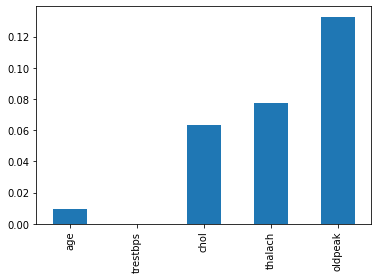

In [5]:
continuous_var=[features for features in df.columns if features not in discrete_var and features not in ['target']]
print(continuous_var)
X2=df[continuous_var]
Y2=df['target'].copy()
from sklearn.feature_selection import mutual_info_classif
mt=mutual_info_classif(X2,Y2)  
mt
mt=pd.Series(mt)
mt.index=X2.columns
mt.plot.bar()

In [9]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

correlation_ratio(df['oldpeak'],df['target'])

0.5432841074078943

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
columns = ['chol','thalach','oldpeak']
for elements in columns:    
    sns.scatterplot(x='trestbps',y=elements,data=df,hue='target')
    plt.ylabel(elements)
    plt.show()

In [ ]:
import seaborn as sns 
sns.relplot(x='age',y='thalach',data=df,hue='target')

In [ ]:
df.info()

In [ ]:
df['age'].plot.hist()

In [ ]:
import seaborn as sns
sns.distplot(df['age'],hist=False)
df['age'].skew()

In [ ]:
sns.countplot(x='sex',hue='target',data=df)

In [ ]:
sns.countplot('cp',data=df)

In [ ]:
df['trestbps'].plot.hist()

In [ ]:
sns.distplot(df['trestbps'])
df['trestbps'].skew()

In [ ]:
df['chol'].plot.hist()

In [ ]:
sns.distplot(df['chol'])
df['chol'].skew()

In [ ]:
df['chol']=np.log(df['chol'])
sns.distplot(df['chol'])
df['chol'].skew()

In [ ]:
df.head()

In [ ]:
sns.countplot(x='fbs',data=df)

In [ ]:
sns.countplot(x='restecg',data=df)

In [ ]:
sns.distplot(df['thalach'])
df['thalach'].skew()

In [ ]:
sns.countplot(x='exang',data=df)

In [ ]:
sns.distplot(df['oldpeak'])
df['oldpeak'].skew()

In [ ]:
df['oldpeak'].isnull().sum()

In [ ]:
df['oldpeak']=np.sqrt(df['oldpeak'])

In [ ]:
sns.distplot(df['oldpeak'])
df['oldpeak'].skew()

In [ ]:
df.head()

In [ ]:
sns.countplot('slope',data=df)

In [ ]:
sns.countplot('ca',data=df)

In [ ]:
sns.countplot('thal',data=df)

In [ ]:
sns.countplot('target',data=df)

In [ ]:
df.head()

In [ ]:
X=df.drop(['target'],axis=1)
X.head()

In [ ]:
Y=df['target'].copy()
Y.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print(f"{len(X_train)}  {len(X_test)}")
print(f"{len(Y_train)}  {len(Y_test)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
model=XGBClassifier(reg_lambda= 1,reg_alpha= 1,n_estimators = 400,max_depth = 8,gamma = 0,eta = 0.5)
model.fit(X_train,Y_train)

In [ ]:
Y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,fbeta_score,precision_score,recall_score,classification_report
score1=confusion_matrix(Y_test,Y_pred,labels=[0,1])
score=classification_report(Y_test,Y_pred)
print(score1)

In [ ]:
print(score)

In [ ]:
precision_score(Y_test,Y_pred)

In [ ]:
recall_score(Y_test,Y_pred)

In [ ]:
s=accuracy_score(Y_test,Y_pred)

In [ ]:
s

In [ ]:
f_score=fbeta_score(Y_test,Y_pred,beta=1)

In [ ]:
f_score

In [ ]:
# error_rate=[]
# for element in range(1,40):
#     model=KNeighborsClassifier(n_neighbors=element)
#     model.fit(X_train,Y_train)
#     Y_pred=model.predict(X_test)
#     error_rate.append(np.mean(Y_pred != Y_test))

In [ ]:
# import matplotlib.pyplot as plt 
# %matplotlib inline 
# plt.plot(range(1,40),error_rate)
# plt.xlabel('K_neighbor')
# plt.ylabel('Error')
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,Y,cv=10,scoring='roc_auc')
print(np.mean(score))

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm1=0
    Y_pred_prob=model.predict_proba(X_test)
    Y_pred2=binarize(Y_pred_prob,i/10)[:,1]
    cm1=confusion_matrix(Y_test,Y_pred2)
    print(cm1)
    print(i)

In [ ]:
Y_pred_prob=model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_prob)
thresholds

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(Y_pred_prob>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X,Y)
plt.plot([0,1],[0,1],color='r',linestyle='--')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,KFold
params={
    'n_estimators':[100,200,300,400,500],
    'gamma':[0,0.1,0.2,0.3,0.4,0.5],
    'eta':[0.05,0.1,0.2,0.3,0.4,0.5],
    'max_depth':[3,4,5,6,7,8,9,10],
    'reg_alpha':[0,1],
    'reg_lambda':[0,1]
}
cv=KFold(n_splits=5,shuffle=True,random_state=0)
random_search=RandomizedSearchCV(model,param_distributions=params,cv=cv,scoring='f1',verbose=3)
random_search.fit(X,Y)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_score_